# 1주차 TASK 가보자고~~


* 선택한 도메인 - **스포츠(축구)**
* 이유 및 동기 - **평소에 관심갖는 분야 + PILOT이라는 가벼운 마음가짐**
* 해결해보고 싶은 과제 - **선수들의 몸값은 어떤 게 원인이 될까? 실제 실력의 몇 퍼센트일까?**


# TASK 1. 데이터 출처 설명 / 데이터 불러오기


* 데이터 - https://github.com/dcaribou/transfermarkt-datasets?tab=readme-ov-file


* 데이터셋 정보 - Clean, structured and automatically updated football (soccer) dataset built from Transfermarkt data -- 68,000+ games, 30,000+ players, 1,500,000+ appearances and more, refreshed weekly.


* 해석: **Transfermarkt**(선수들 가치와 스탯을 정리해놓은 플랫폼) 데이터를 기반으로 구축된 깔끔하고 구조화된 축구(사커) 데이터셋 — 68,000개 이상의 경기, 30,000명 이상의 선수, 1,500,000건 이상의 출전 기록 등을 포함하며, 매주 업데이트됩니다.


# Table	Description	Scale


*   competitions - Leagues and tournaments (40*)
*   clubs - Club details, squad size, market value (400+)
*   players - 	Player profiles, positions, market values (30,000+)
*   games - Match results, lineups, attendance (68,000+)
*   appearances - One row per player per game played (1,500,000+)
*   player_valuations - Historical market value records (450,000+)
*   club_games - Per-club view of each game (136,000+)
*   game_events - Goals, cards, substitutions (950,000+)
*   game_lineups - Starting and bench lineups (81,000+)
*   transfers - Player transfers between clubs (--)


# 1. 수치형 변수 (Numerical Variables)
* market_value_in_eur : 현재 이적시장 가치 (예측해야 할 타겟 변수, 단위: 유로)
* highest_market_value_in_eur : 선수의 역대 최고 몸값
* height_in_cm : 선수의 키
* goals : 득점 수 (appearances 테이블에서 합산하여 생성)
* assists : 어시스트 수 (appearances 테이블에서 합산하여 생성)
* minutes_played : 총 출전 시간 (appearances 테이블에서 합산하여 생성)
* age : 나이 (생년월일인 date_of_birth를 기준으로 현재 연도에서 빼서 새롭게 만들 파생 변수)

# 2. 범주형 변수 (Categorical Variables)
* position : 대분류 포지션 (예: Attack, Defender, Midfield, Goalkeeper)
* sub_position : 세부 포지션 (예: Centre-Forward, Centre-Back 등)
* foot : 주로 쓰는 발 (예: right, left, both)
* country_of_citizenship : 국적 (예: Spain, Brazil, Korea, South 등)
* current_club_id : 현재 소속된 구단의 고유 ID
* current_club_domestic_competition_id : 소속 리그 (예: GB1-프리미어리그, ES1-라리가 등)
* player_id : 선수의 고유 식별 번호 (데이터 병합용 Key 변수이며, 모델링할 때는 제외)

# 데이터셋 확인해보기

**players, appearances, player_valuations**를 확인해볼 예정입니다

In [45]:
# players 데이터셋 불러오기
df_players_bf = pd.read_csv('/players.csv.gz')
df_raw = df_players_bf.copy()

In [46]:
df_players_bf.head()

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,right,184.0,NaN,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,...,left,190.0,NaN,Neubauer 13 GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,Borussia Dortmund,750000.0,8000000.0
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,...,NaN,NaN,NaN,CSKA-AS-23 Ltd.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitar-berbat...,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0
3,77,NaN,Lúcio,Lúcio,2012,506,lucio,Brazil,Brasília,Brazil,...,NaN,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lucio/profil/s...,IT1,Juventus Football Club,200000.0,24500000.0
4,80,Tom,Starke,Tom Starke,2017,27,tom-starke,East Germany (GDR),Freital,Germany,...,right,194.0,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tom-starke/pro...,L1,FC Bayern München,100000.0,3000000.0


In [47]:
df_players_bf.tail()

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
34304,1498276,Ahmed,Traore,Ahmed Traore,2025,6646,ahmed-traore,Cote d'Ivoire,Yamoussoukro,Cote d'Ivoire,...,left,174.0,2028-06-30 00:00:00,Tamegnon Consulting,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/ahmed-traore/p...,TR1,Fatih Karagümrük Sportif Faaliyetler San. Tic....,NaN,NaN
34305,1500143,Moussa,Kone,Moussa Kone,2025,6646,moussa-kone,Cote d'Ivoire,Daloa,Cote d'Ivoire,...,right,185.0,2028-06-30 00:00:00,Tamegnon Consulting,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/moussa-kone/pr...,TR1,Fatih Karagümrük Sportif Faaliyetler San. Tic....,NaN,NaN
34306,1507992,Ransford,Amoo,Ransford Amoo,2025,443,ransford-amoo,NaN,NaN,Ghana,...,NaN,NaN,2030-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/ransford-amoo/...,DK1,Vejle Boldklub,NaN,NaN
34307,1510255,Miguel,Silva,Miguel Silva,2025,979,miguel-silva,NaN,NaN,Portugal,...,NaN,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miguel-silva/p...,PO1,Moreirense Futebol Clube,NaN,NaN
34308,1511508,Yaya,Onogo,Yaya Onogo,2025,6646,yaya-onogo,Cote d'Ivoire,Abongoua Kotobi,Cote d'Ivoire,...,right,NaN,2028-06-30 00:00:00,Tamegnon Consulting,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/yaya-onogo/pro...,TR1,Fatih Karagümrük Sportif Faaliyetler San. Tic....,NaN,NaN


# 문제점 발견

데이터 양이 너무 방대합니다.

축구를 좀 봤던 저에게 있어서도 정말 처음 보는 선수가 head와 tail에서 발견됐습니다.

그래서 그 폭을 줄여보려고 합니다

In [48]:
# last_season 컬럼이 2023 이상인 데이터만 남깁니다
df_recent = df_players_bf[df_players_bf['last_season'] >= 2023]

In [49]:
# 선수들이 뛰고 있는 리그도 '유럽 5대 빅리그' 선수만 남겨서 데이터 양을 압축합니다
# GB1: 잉글랜드 프리미어리그, ES1: 스페인 라리가, IT1: 이탈리아 세리에A,
# L1: 독일 분데스리가, FR1: 프랑스 리그앙
big_5_leagues = ['GB1', 'ES1', 'IT1', 'L1', 'FR1']
df_players = df_recent[df_recent['current_club_domestic_competition_id'].isin(big_5_leagues)]

In [50]:
# 데이터 수 변화 확인하기
print(f"필터링 전 전체 선수: {len(df_players_bf):,}명")
print(f"최근 시즌 & 빅리그 선수: {len(df_players):,}명")

필터링 전 전체 선수: 34,309명
최근 시즌 & 빅리그 선수: 4,689명


In [51]:
# 데이터 다시 확인 (최신 선수들 보기)
df_players.head()

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
188,3333,James,Milner,James Milner,2025,1237,james-milner,England,Leeds,England,...,right,175.0,2026-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/james-milner/p...,GB1,Brighton and Hove Albion Football Club,750000.0,20000000.0
644,7161,Jonas,Hofmann,Jonas Hofmann,2025,15,jonas-hofmann,Germany,Heidelberg,Germany,...,right,176.0,2027-06-30 00:00:00,Dr. Marco Gutfleisch,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/jonas-hofmann/...,L1,Bayer 04 Leverkusen Fußball,2000000.0,16000000.0
723,7825,Pepe,Reina,Pepe Reina,2023,1050,pepe-reina,Spain,Madrid,Spain,...,right,188.0,2025-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/pepe-reina/pro...,ES1,Villarreal Club de Fútbol S.A.D.,600000.0,22000000.0
762,8246,Philipp,Pentke,Philipp Pentke,2023,3,philipp-pentke,East Germany (GDR),Freiberg,Germany,...,right,191.0,2025-06-30 00:00:00,Bigpoint,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/philipp-pentke...,L1,1. Fußball-Club Köln,300000.0,400000.0
918,12029,Ludovic,Butelle,Ludovic Butelle,2024,1421,ludovic-butelle,France,Reims,France,...,left,188.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/ludovic-butell...,FR1,Stade Reims,100000.0,1500000.0


In [52]:
df_players.tail()

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
34267,1384911,Samu,Becerra,Samu Becerra,2025,367,samu-becerra,NaN,NaN,Spain,...,right,NaN,2027-06-30 00:00:00,Sports&Life,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/samu-becerra/p...,ES1,Rayo Vallecano de Madrid S. A. D.,300000.0,300000.0
34269,1390649,Yan,Diomande,Yan Diomande,2025,23826,yan-diomande,Cote d'Ivoire,Abidjan,Cote d'Ivoire,...,right,180.0,2030-06-30 00:00:00,Roc Nation Sports,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/yan-diomande/p...,L1,RasenBallsport Leipzig,1500000.0,1500000.0
34282,1411351,Josito,González,Josito González,2024,472,josito-gonzalez,NaN,NaN,Venezuela,...,NaN,NaN,2027-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/josito-gonzale...,ES1,UD Las Palmas,NaN,NaN
34295,1453066,Carlos,Macià,Carlos Macià,2025,1050,carlos-macia,Spain,Elche,Spain,...,right,190.0,2029-06-30 00:00:00,All Iron Sports,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/carlos-macia/p...,ES1,Villarreal Club de Fútbol S.A.D.,NaN,NaN
34303,1497653,Bara,Sapoko Ndiaye,Bara Sapoko Ndiaye,2025,27,bara-sapoko-ndiaye,NaN,NaN,Senegal,...,right,180.0,2026-06-30 00:00:00,4FC,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/bara-sapoko-nd...,L1,FC Bayern München,300000.0,300000.0


In [69]:
df_players.shape

(4689, 23)

# 다른 데이터셋 확인해보기

players를 확인했는데, appearances나 valuations도 확인해보겠습니다

In [53]:
df_appearances_before = pd.read_csv('/appearances.csv.gz')
df_raw = df_appearances_before.copy()

In [54]:
df_appearances_before.head()

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
3,2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
4,2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90


In [55]:
df_appearances_before.tail()

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
1731646,4805903_724129,4805903,724129,1082,1082,2026-02-26,Matías Fernández-Pardo,EL,0,0,0,0,120
1731647,4805903_80293,4805903,80293,1082,1082,2026-02-26,Aïssa Mandi,EL,0,0,0,0,120
1731648,4805903_816580,4805903,816580,1082,1082,2026-02-26,Tiago Santos,EL,0,0,0,0,95
1731649,4805903_82442,4805903,82442,1082,1082,2026-02-26,Olivier Giroud,EL,0,0,1,0,120
1731650,4805903_84301,4805903,84301,1082,1082,2026-02-26,Benjamin André,EL,0,0,0,1,120


In [56]:
df_player_valuations_before = pd.read_csv('/player_valuations.csv.gz')
df_raw = df_player_valuations_before.copy()

In [57]:
df_player_valuations_before.head()

,player_id,date,market_value_in_eur,current_club_name,current_club_id,player_club_domestic_competition_id
0,405973,2000-01-20,150000,Unknown,3057,BE1
1,342216,2001-07-20,100000,Unknown,1241,SC1
2,3132,2003-12-09,400000,Dynamo Kyiv,126,TR1
3,6893,2003-12-15,900000,Galatasaray,984,GB1
4,12359,2004-03-11,250000,RC Lens B,8152,NaN


In [58]:
df_player_valuations_before.tail()

,player_id,date,market_value_in_eur,current_club_name,current_club_id,player_club_domestic_competition_id
435370,1181950,2026-02-28,10000,Arnavutköy Belediyesi FSK,45493,NaN
435371,1256115,2026-02-28,100000,Karacabey Belediye Spor,20699,NaN
435372,1303292,2026-02-28,25000,Ankara Demirspor,12524,NaN
435373,1355285,2026-02-28,50000,Hellas Verona,276,IT1
435374,1497653,2026-02-28,300000,Bayern Munich,27,L1


# 마찬가지로, 정말 방대한 데이터 양입니다

이번에도 필터링을 해보겠습니다.
그런데 조금 다른 방식으로요

앞에서 필터링한 고유 id를 활용할 예정입니다

In [59]:
# 앞서 필터링한 선수들의 고유 ID(player_id) 목록을 추출하고
valid_player_ids = df_players['player_id'].unique()
print(f"✅ 필터링한 선수 수: {len(valid_player_ids):,}명\n")

✅ 필터링한 선수 수: 4,689명



In [60]:
# 필터링 선수들의 기록만 남기기
df_appearances = df_appearances_before[df_appearances_before['player_id'].isin(valid_player_ids)].copy()

In [61]:
df_appearances.head()

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
39,2234404_55735,2234404,55735,660,46,2012-07-09,Henrikh Mkhitaryan,UKRS,0,0,0,0,90
222,2222963_206717,2222963,206717,6994,667,2012-07-14,Eduard Sobol,UKR1,0,0,0,0,90
344,2222959_55735,2222959,55735,660,46,2012-07-15,Henrikh Mkhitaryan,UKR1,0,0,2,2,90
430,2224730_48015,2224730,48015,3426,162,2012-07-15,Lukas Hradecky,DK1,0,0,0,0,90
469,2224731_107775,2224731,107775,2414,89,2012-07-16,Frederik Rönnow,DK1,0,0,0,0,90


In [62]:
df_appearances.tail()

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
1731646,4805903_724129,4805903,724129,1082,1082,2026-02-26,Matías Fernández-Pardo,EL,0,0,0,0,120
1731647,4805903_80293,4805903,80293,1082,1082,2026-02-26,Aïssa Mandi,EL,0,0,0,0,120
1731648,4805903_816580,4805903,816580,1082,1082,2026-02-26,Tiago Santos,EL,0,0,0,0,95
1731649,4805903_82442,4805903,82442,1082,1082,2026-02-26,Olivier Giroud,EL,0,0,1,0,120
1731650,4805903_84301,4805903,84301,1082,1082,2026-02-26,Benjamin André,EL,0,0,0,1,120


In [70]:
df_appearances.shape

(449285, 13)

In [63]:
# 마찬가지로 player_valuations (과거 몸값 히스토리) 데이터 필터링
# 앞서 필터링했던 선수들의 기록만 남기기
df_player_valuations = df_player_valuations_before[df_player_valuations_before['player_id'].isin(valid_player_ids)].copy()

In [64]:
df_player_valuations.head()

,player_id,date,market_value_in_eur,current_club_name,current_club_id,player_club_domestic_competition_id
5,3333,2004-04-10,7500000,Newcastle United,399,GB1
6,12029,2004-04-10,1500000,Valencia CF,347,FR1
10,14086,2004-04-10,50000,Watford FC,1010,GB1
11,14555,2004-04-10,400000,Leeds United,399,GB1
12,15452,2004-04-10,800000,Getafe CF,6182,NaN


In [65]:
df_player_valuations.tail()

,player_id,date,market_value_in_eur,current_club_name,current_club_id,player_club_domestic_competition_id
435359,1074990,2026-02-28,1000000,Borussia Dortmund U19,1464,NaN
435360,1099924,2026-02-28,1500000,Cagliari Primavera,1390,IT1
435361,1118293,2026-02-28,800000,1.FC Köln U19,3,L1
435373,1355285,2026-02-28,50000,Hellas Verona,276,IT1
435374,1497653,2026-02-28,300000,Bayern Munich,27,L1


In [71]:
df_player_valuations.shape

(41048, 6)

# 최종

흩어져 있던 데이터를 하나의 완벽한 표로 병합하는 게 좋아보입니다

다행히 제가 앞에서 모든 데이터가 player_id라는 공통된 열쇠(Key)를 가지고 있기 때문에 당연히 하나로 합칠 수 있을 것 같은데요.

players 데이터는 **선수 1명당 1줄**입니다.

appearances 데이터는 **선수 1명당 여러 줄(출전한 경기 수만큼)**입니다.

그래서 appearances 데이터를 선수별로 묶어서(groupby) '총 득점', '총 어시스트' 등으로 합산한 뒤에 합치려고 합니다.

In [72]:
# 1. appearances 데이터를 선수별로 묶어서 스탯 총합(sum) 구하기
# player_id를 기준으로 출전 시간, 골, 어시스트를 모두 더해주기
player_stats = df_appearances.groupby('player_id')[['minutes_played', 'goals', 'assists']].sum().reset_index()

# 2. 선수 데이터(df_players)와 스탯 데이터(player_stats) 병합
# 'left'로 왼쪽 데이터(df_players)를 기준으로 뼈대를 잡고 합칩니다
df = pd.merge(df_players, player_stats, on='player_id', how='left')

# 3. 부상 관련 경기는 NaN으로 나왔고 이를 0으로 채워줍니다.
df[['minutes_played', 'goals', 'assists']] = df[['minutes_played', 'goals', 'assists']].fillna(0)

# 4. 나이 파생 변수 만들기
# 생년월일을 날짜 데이터로 변환한 뒤, 현재 연도(2026)에서 태어난 연도를 뺍니다.
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])
df['age'] = 2026 - df['date_of_birth'].dt.year

# 5. 최종 병합된 데이터 확인
cols_to_show = ['name', 'age', 'current_club_domestic_competition_id', 'position',
                'minutes_played', 'goals', 'assists', 'market_value_in_eur']

print(f"최종 병합된 데이터 크기: {df.shape}")
display(df[cols_to_show].head(10))

최종 병합된 데이터 크기: (4689, 27)


,name,age,current_club_domestic_competition_id,position,minutes_played,goals,assists,market_value_in_eur
0,James Milner,40.0,GB1,Midfield,26456.0,39.0,70.0,750000.0
1,Jonas Hofmann,34.0,L1,Midfield,21843.0,70.0,83.0,2000000.0
2,Pepe Reina,44.0,ES1,Goalkeeper,30675.0,0.0,2.0,600000.0
3,Philipp Pentke,41.0,L1,Goalkeeper,1110.0,0.0,0.0,300000.0
4,Ludovic Butelle,43.0,FR1,Goalkeeper,13533.0,0.0,1.0,100000.0
5,Daley Blind,36.0,ES1,Defender,40502.0,23.0,26.0,1400000.0
6,Alessio Cragno,32.0,IT1,Goalkeeper,16308.0,0.0,0.0,1500000.0
7,Andy Lonergan,43.0,GB1,Goalkeeper,0.0,0.0,0.0,100000.0
8,Ashley Young,41.0,GB1,Defender,26590.0,18.0,44.0,400000.0
9,Scott Carson,41.0,GB1,Goalkeeper,3062.0,0.0,0.0,250000.0


# 마음이 편안해지네요


# TASK 2. 기초 통계 확인

# 데이터 형태 확인하기

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4689 entries, 0 to 4688
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   player_id                             4689 non-null   int64         
 1   first_name                            4529 non-null   object        
 2   last_name                             4689 non-null   object        
 3   name                                  4689 non-null   object        
 4   last_season                           4689 non-null   int64         
 5   current_club_id                       4689 non-null   int64         
 6   player_code                           4689 non-null   object        
 7   country_of_birth                      4503 non-null   object        
 8   city_of_birth                         4503 non-null   object        
 9   country_of_citizenship                4689 non-null   object        
 10  

In [74]:
df.shape

(4689, 27)

In [75]:
df.nunique()

,0
player_id,4689
first_name,2003
last_name,4019
name,4675
last_season,3
current_club_id,119
player_code,4675
country_of_birth,127
city_of_birth,2244
country_of_citizenship,125


In [77]:
df.describe()

,player_id,last_season,current_club_id,date_of_birth,height_in_cm,market_value_in_eur,highest_market_value_in_eur,minutes_played,goals,assists,age
count,4.689000e+03,4689.000000,4689.000000,4686,4456.000000,4.252000e+03,4.252000e+03,4689.000000,4689.000000,4689.000000,4686.000000
mean,5.664075e+05,2024.255065,1372.882704,2000-02-07 06:17:03.303457152,183.481822,8.151767e+06,1.326852e+07,6642.345489,10.099168,7.934314,26.339522
min,3.333000e+03,2023.000000,3.000000,1981-03-25 00:00:00,163.000000,1.000000e+04,1.000000e+04,0.000000,0.000000,0.000000,17.000000
25%,2.964220e+05,2023.000000,167.000000,1996-09-01 06:00:00,179.000000,7.000000e+05,1.200000e+06,71.000000,0.000000,0.000000,22.000000
50%,5.472480e+05,2025.000000,506.000000,2001-01-05 12:00:00,184.000000,2.500000e+06,5.000000e+06,2385.000000,1.000000,1.000000,25.000000
75%,8.277340e+05,2025.000000,1047.000000,2004-03-02 00:00:00,188.000000,8.000000e+06,1.800000e+07,10153.000000,9.000000,9.000000,30.000000
max,1.497653e+06,2025.000000,23826.000000,2009-12-31 00:00:00,206.000000,2.000000e+08,2.000000e+08,50537.000000,480.000000,217.000000,45.000000
std,3.232311e+05,0.839630,3075.811054,NaN,6.843882,1.547702e+07,2.003039e+07,8947.476758,25.059804,16.183170,5.062403


In [78]:
# 2. 결측치(빈 데이터) 확인
df.isnull().sum()

,0
player_id,0
first_name,160
last_name,0
name,0
last_season,0
current_club_id,0
player_code,0
country_of_birth,186
city_of_birth,186
country_of_citizenship,0


In [94]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

if len(missing_values) > 0:
    print(missing_values)

agent_name                     1240
contract_expiration_date        549
highest_market_value_in_eur     437
market_value_in_eur             437
height_in_cm                    233
foot                            190
city_of_birth                   186
country_of_birth                186
first_name                      160
date_of_birth                     3
age                               3
sub_position                      1
dtype: int64


In [95]:
# 원본 데이터를 보존하기 위해 복사본 만들기
df_cleaned = df.copy()

# 전략 1. 예측할 '정답(몸값)'이 없는 데이터 삭제
df_cleaned = df_cleaned.dropna(subset=['market_value_in_eur'])

In [96]:
# 불필요하고 결측치가 너무 많은 컬럼 제외시키기
# 에이전트 이름, 계약 만료일, 역대 최고 몸값 제외
# 태어난 국가와 도시도 중요한 요소는 아니니 제외
# name 칸이 따로 있으니 first name도 지워주기
cols_to_drop = ['agent_name', 'city_of_birth', 'country_of_birth',
                'first_name', 'highest_market_value_in_eur', 'contract_expiration_date']
df_cleaned = df_cleaned.drop(columns=cols_to_drop, errors='ignore')

In [97]:
missing_values = df_cleaned.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

if len(missing_values) > 0:
    print(missing_values)

height_in_cm     121
foot              97
date_of_birth      1
sub_position       1
age                1
dtype: int64


결측치인 키와 주발을 어떻게 처리해야 할지가 고민입니다

[방법 1] 그냥 없앤다 (그렇게 많은 양의 데이터를 처리하고 있지는 않다)

1%도 안되는 양의 수치이기 때문이다

In [101]:
print(df_cleaned.shape)

(4252, 21)


In [ ]:
[방법 2] 유의미한 결측치일 수도 있으니 그 값을 평균치로 때려넣는다

키는 평균 키로, 주발은 'right'로 채우는 방식입니다

제미나이한테 코드를 짜달라고 한 다음

결측치에 해당하는 선수들의 몸값을 봤는데

In [105]:
# 1. 비교를 위해 '몸값'은 적혀 있는 선수들만 남깁니다.
df_test = df.dropna(subset=['market_value_in_eur']).copy()

# 2. '키(height_in_cm)'가 비어있는지 여부를 나타내는 새로운 변수를 만듭니다.
# True면 빈칸(결측치), False면 키가 적혀있는 정상 데이터입니다.
df_test['is_missing_profile'] = df_test['height_in_cm'].isnull()

# 3. 두 그룹의 평균, 최댓값 등 기초 통계량 비교
print("=== 📊 프로필 결측 여부에 따른 몸값 통계 비교 ===")
# 지수표현식(e+06) 방지 및 보기 쉽게 출력
pd.options.display.float_format = '{:,.0f}'.format
display(df_test.groupby('is_missing_profile')['market_value_in_eur'].describe())

plt.show()

=== 📊 프로필 결측 여부에 따른 몸값 통계 비교 ===


,count,mean,std,min,25%,50%,75%,max
is_missing_profile,,,,,,,,
False,"4,131","8,384,058","15,641,545","10,000","800,000","2,500,000","9,000,000","200,000,000"
True,121,"221,240","224,005","10,000","100,000","150,000","250,000","1,000,000"


max가 1,000,000인 것으로 보아, 없어도 되겠다는 생각이 드네요

그냥 삭제시켜버리겠습니다

In [108]:
# 키, 주발 등 빈칸이 하나라도 있는 선수 가차없이 삭제!
cols_to_check = ['height_in_cm', 'foot', 'age', 'sub_position']
df_cleaned = df_cleaned.dropna(subset=cols_to_check)

In [109]:
# 최종 확인
df_cleaned.isnull().sum()

,0
player_id,0
last_name,0
name,0
last_season,0
current_club_id,0
player_code,0
country_of_citizenship,0
date_of_birth,0
sub_position,0
position,0


In [110]:
# 3. 중복 데이터 확인
df_cleaned.duplicated().sum()

np.int64(0)

In [112]:
# 4. 수치형 변수(숫자) 통계 확인
# 숫자(금액 등)가 e+06 지수 형태로 나오는 걸 방지하고 천 단위 콤마(,)를 찍어준다

pd.options.display.float_format = '{:,.0f}'.format
display(df_cleaned.describe())
print("\n" + "="*60 + "\n")

,player_id,last_season,current_club_id,date_of_birth,height_in_cm,market_value_in_eur,minutes_played,goals,assists,age
count,"4,083","4,083","4,083",4083,"4,083","4,083","4,083","4,083","4,083","4,083"
mean,"509,614","2,024","1,362",1999-05-03 10:13:18.824393728,183,"8,473,186","7,614",12,9,27
min,"3,333","2,023",3,1981-03-25 00:00:00,163,"10,000",0,0,0,17
25%,"266,984","2,024",167,1995-12-31 00:00:00,178,"800,000",492,0,0,23
50%,"475,416","2,025",506,2000-01-09 00:00:00,184,"2,500,000","3,793",2,2,26
75%,"717,438","2,025","1,047",2003-03-19 12:00:00,188,"9,000,000","11,909",11,11,30
max,"1,497,653","2,025","23,826",2009-02-27 00:00:00,206,"200,000,000","50,537",480,217,45
std,"298,627",1,"3,052",NaN,7,"15,710,188","9,195",27,17,5


In [111]:
# 5. 범주형 변수(글자) 통계 확인
# object 타입(글자형) 데이터만 따로 모아서 보자

display(df_cleaned.describe(include=['object']))

,last_name,name,player_code,country_of_citizenship,sub_position,position,foot,image_url,url,current_club_domestic_competition_id,current_club_name
count,4083,4083,4083,4083,4083,4083,4083,4083,4083,4083,4083
unique,3542,4074,4074,123,13,4,3,3981,4083,5,119
top,García,David López,david-lopez,Spain,Centre-Back,Defender,right,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/bara-sapoko-nd...,IT1,Sevilla Fútbol Club S.A.D.
freq,20,2,2,551,756,1345,2852,103,1,881,51


# Task3. 분석 목적/인사이트 설명


**1. 실력(스탯)과 시장 가치(몸값)의 괴리 검증 및 가성비 발굴**
* **목적:** 단순히 '출전 시간'이나 '공격포인트'로 계산된 선수의 최근 경기력이 실제 이적시장 몸값을 얼마나 정직하게 반영하고 있는지 확인 및 검증한다.
* **인사이트:** 회귀 추세선을 활용하여 스탯 대비 몸값이 과도하게 높은 '거품(고평가)' 그룹과, 실력은 뛰어나지만 몸값이 저렴한 '가성비(저평가)' 그룹을 명확히 분류해 낸다. 이를 통해 이적시장의 가격 불균형을 시각적으로 확인한다.

**2. 에이징 커브(Aging Curve)와 포텐셜 프리미엄 확인**
* **목적:** 선수의 '나이'가 단순한 숫자를 넘어 몸값에 미치는 비선형적(역 U자형) 영향을 파악하고, 이적시장이 선수의 미래 가치에 지불하는 비용을 분석한다.
* **인사이트:** 20대 초반 선수들에게는 현재 기량 이상의 거대한 '포텐셜 거품(잠재력 프리미엄)'이 존재하며, 반대로 30대 베테랑들은 훌륭한 스탯을 유지하더라도 재판매 가치 하락으로 몸값이 급락한다는 사실을 증명한다.

**3. 이적시장의 구조적 요인 및 숨은 가치 파악**
* **목적:** 순수한 축구 실력 외에 포지션의 특성이나 비즈니스적 요인(예: 잔여 계약 기간, 에이전트 파워 등)이 선수의 최종 가격표를 결정짓는 핵심 패턴을 파악한다.
* **인사이트:** 골과 직결되는 포지션에 붙는 '공격수 프리미엄'이나 계약 만료 임박에 따른 가치 하락 비율 등을 수치로 계산해 볼 수 있다. 이는 실제 프로 구단이 한정된 예산으로 영입 리스트를 짤 때 활용할 수 있는 '데이터 기반의 스카우팅 및 가성비 영입 가이드라인'으로 확장이 가능하다.

# Task 4. EDA - 변수 간 관계 분석 및 시각화


In [116]:
# 새로운 변수 만들기: 공격포인트 = 골 + 어시스트
df_cleaned['attack_points'] = df_cleaned['goals'] + df_cleaned['assists']

1. 공격포인트와 몸값 상관계수:
                     attack_points  market_value_in_eur
attack_points                    1                    0
market_value_in_eur              0                    1
------------------------------


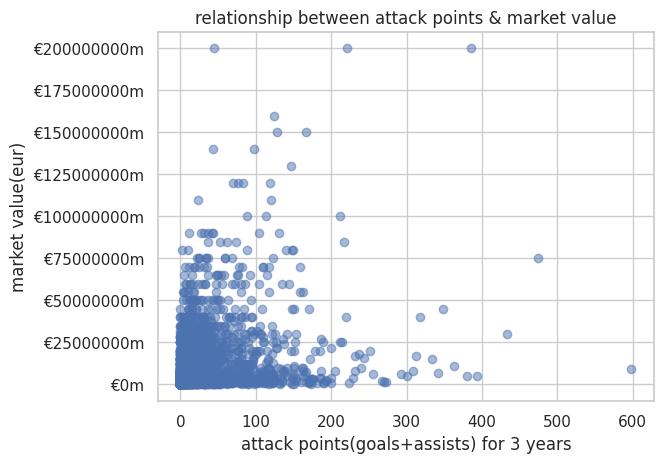

In [126]:
# 1. 공격포인트와 몸값의 상관관계 (Scatter)
print("1. 공격포인트와 몸값 상관계수:")
print(df_cleaned[['attack_points', 'market_value_in_eur']].corr())
print("-" * 30)

plt.scatter(df_cleaned['attack_points'], df_cleaned['market_value_in_eur'], alpha=0.5)
plt.title('relationship between attack points & market value')
plt.xlabel('attack points(goals+assists) for 3 years')
plt.ylabel('market value(eur)')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('€{x:.0f}m'))

plt.show()

**1. 공격포인트와 몸값의 관계 (산점도)**
* **분석:** 상관계수를 확인해 본 결과, 공격포인트와 몸값은 양(+)의 상관관계가 있습니다.
* **인사이트:** 그래프를 보면 공격포인트가 높아질수록 몸값도 높아지는 추세를 보입니다. 하지만 점들이 위아래로 넓게 퍼져있는 것을 통해, 점수가 같더라도 나이나 다른 요인에 의해 몸값(거품이나 가성비)이 크게 차이 날 수 있음을 알 수 있습니다.

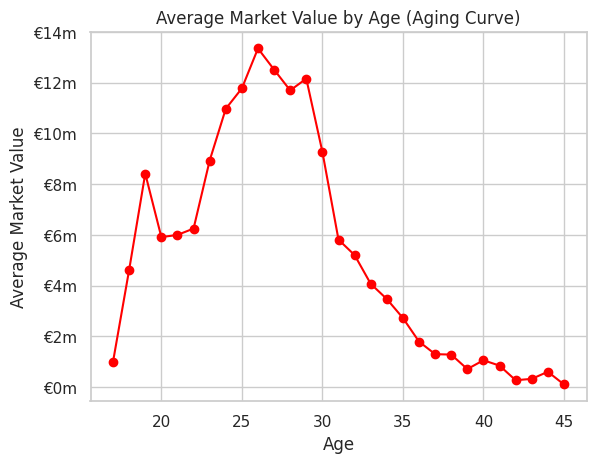

In [125]:
from matplotlib.ticker import StrMethodFormatter # StrMethodFormatter를 임포트합니다.

# 2. 나이와 평균 몸값의 관계 (Plot)
# 나이별로 몸값 평균을 구합니다.
age_mean = df_cleaned.groupby('age')['market_value_in_eur'].mean() / 1000000

plt.plot(age_mean.index, age_mean.values, marker='o', color='red')
plt.title('Average Market Value by Age (Aging Curve)') # 나이에 따른 평균 몸값 (에이징 커브)
plt.xlabel('Age') # 나이
plt.ylabel('Average Market Value') # 평균 몸값

plt.gca().yaxis.set_major_formatter(StrMethodFormatter('€{x:.0f}m'))
plt.show()

**2. 나이와 몸값의 관계 (꺾은선 그래프)**
* **분석:** 나이별 평균 몸값을 구해서 꺾은선 그래프로 그렸습니다.
* **인사이트:** 몸값은 나이와 정비례하지 않고, 26~27세 부근에서 최고점을 찍은 뒤 30대부터 뚝 떨어지는 '산 모양(에이징 커브)'을 그립니다. 어린 유망주들의 몸값이 비싸고, 베테랑 선수들은 실력이 좋아도 몸값이 싼 이유를 확인할 수 있습니다.

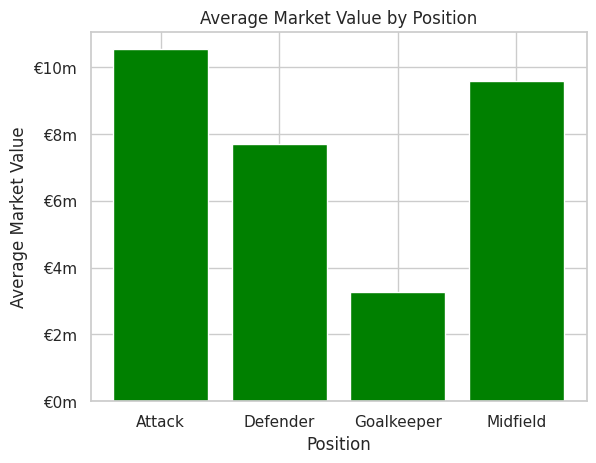

In [127]:

# ==========================================
# 3. 포지션별 평균 몸값 (Bar)
# ==========================================
# 포지션별로 몸값 평균을 구합니다.
pos_mean = df_cleaned.groupby('position')['market_value_in_eur'].mean() / 1000000

plt.bar(pos_mean.index, pos_mean.values, color='green')
plt.title('Average Market Value by Position') # 포지션별 평균 몸값 비교
plt.xlabel('Position') # 포지션
plt.ylabel('Average Market Value') # 평균 몸값

plt.gca().yaxis.set_major_formatter(StrMethodFormatter('€{x:.0f}m'))
plt.show()

**3. 포지션별 평균 몸값 (막대 그래프)**
* **분석:** 4가지 포지션별로 선수들의 평균 몸값을 비교했습니다.
* **인사이트:** 막대그래프를 보면 공격수(Attack)와 미드필더(Midfield)의 평균 몸값이 수비수나 골키퍼보다 확실히 높습니다. 축구 이적시장에서는 골과 직접적으로 연관된 포지션일수록 더 비싼 대우를 받는다는 것을 확인했습니다.